In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv(r"AAPL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8.042000e+03
mean,16.351917,16.525066,16.178668,16.358983,15.594377,3.831832e+08
std,29.698129,30.021799,29.380971,29.717860,29.448485,3.633095e+08
min,0.114955,0.118304,0.113839,0.115513,0.099037,2.396800e+06
25%,0.367266,0.375000,0.358929,0.367188,0.308924,1.478439e+08
50%,2.111071,2.138393,2.058393,2.106428,1.805978,2.664242e+08
75%,21.204196,21.363661,20.989554,21.170268,18.389792,4.808804e+08
max,161.679993,165.699997,161.000000,165.300003,165.300003,7.421641e+09


In [ ]:
df_n=df[['Date','Open','Close']]
print(df_n)

            Date        Open       Close
0     02-01-1990    0.314732    0.332589
1     03-01-1990    0.339286    0.334821
2     04-01-1990    0.341518    0.335938
3     05-01-1990    0.337054    0.337054
4     08-01-1990    0.334821    0.339286
...          ...         ...         ...
8037  23-11-2021  161.119995  161.410004
8038  24-11-2021  160.750000  161.940002
8039  26-11-2021  159.570007  156.809998
8040  29-11-2021  159.369995  160.240005
8041  30-11-2021  159.990005  165.300003

[8042 rows x 3 columns]


In [ ]:
type(df['Date'][0])

str

In [ ]:
type(df_n['Date'][0])

str

In [ ]:
df_n['Date'][0]

'02-01-1990'

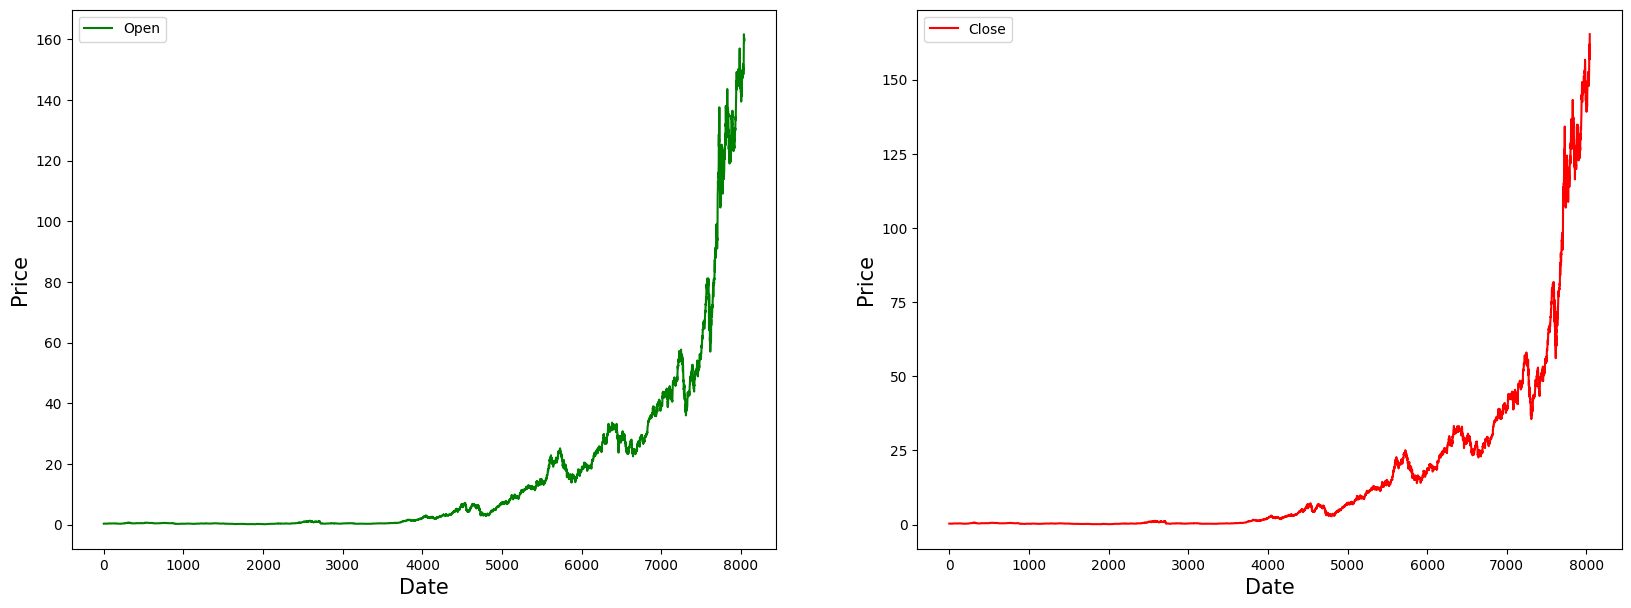

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df_n['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df_n['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [ ]:
df_n.shape

(8042, 3)

In [ ]:
training_size = round(len(df_n) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

6434

In [ ]:
train_data = df_n[:training_size]
test_data  = df_n[training_size:]

train_data.shape, test_data.shape

((6434, 3), (1608, 3))

In [ ]:
def create_sequence(dataset):
                sequences = []
                labels = []
                start_idx = 0
                for stop_idx in range(50,len(dataset)):                   # Selecting 50 rows at a time
                    sequences.append(dataset.iloc[start_idx:stop_idx])
                    labels.append(dataset.iloc[stop_idx])
                    start_idx += 1
                return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((6384, 50, 3), (6384, 3), (1558, 50, 3), (1558, 3))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,102 (121.49 KB)

 Trainable params: 31,102 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
df = pd.read_csv(r'apple_share_price.csv')
df

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321
...,...,...,...,...,...,...
1659,7-Jan-11,47.71,48.05,47.41,48.02,77982212
1660,6-Jan-11,47.82,47.89,47.56,47.68,75106626
1661,5-Jan-11,47.08,47.76,47.07,47.71,63879193
1662,4-Jan-11,47.49,47.50,46.88,47.33,77337001


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321


In [ ]:
df.shape

(1664, 6)

In [ ]:
df1=df.reset_index()['Close'];df1

,Close
0,157.48
1,155.32
2,161.06
3,160.08
4,158.81
5,156.39
6,155.57
7,157.14
8,150.05
9,148.73


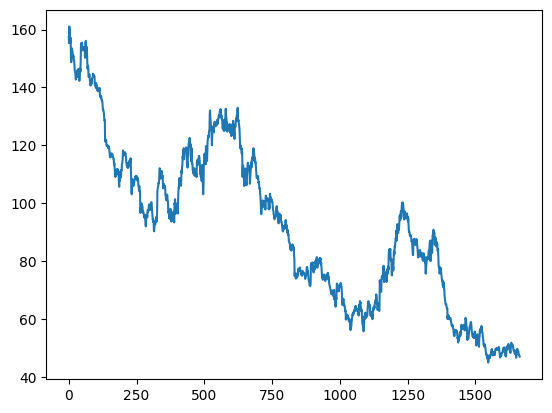

In [ ]:
plt.plot(df1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))

In [ ]:
def create_sequences(data,seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10  # Adjust as needed
X = create_sequences(df['Close'], seq_length)

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train, test = X[0:train_size], X[train_size:len(X)]

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

# Add the first LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout for regularization

# Add a second LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add a third LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add a fourth LSTM layer without return_sequences (default is False)
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Add a Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

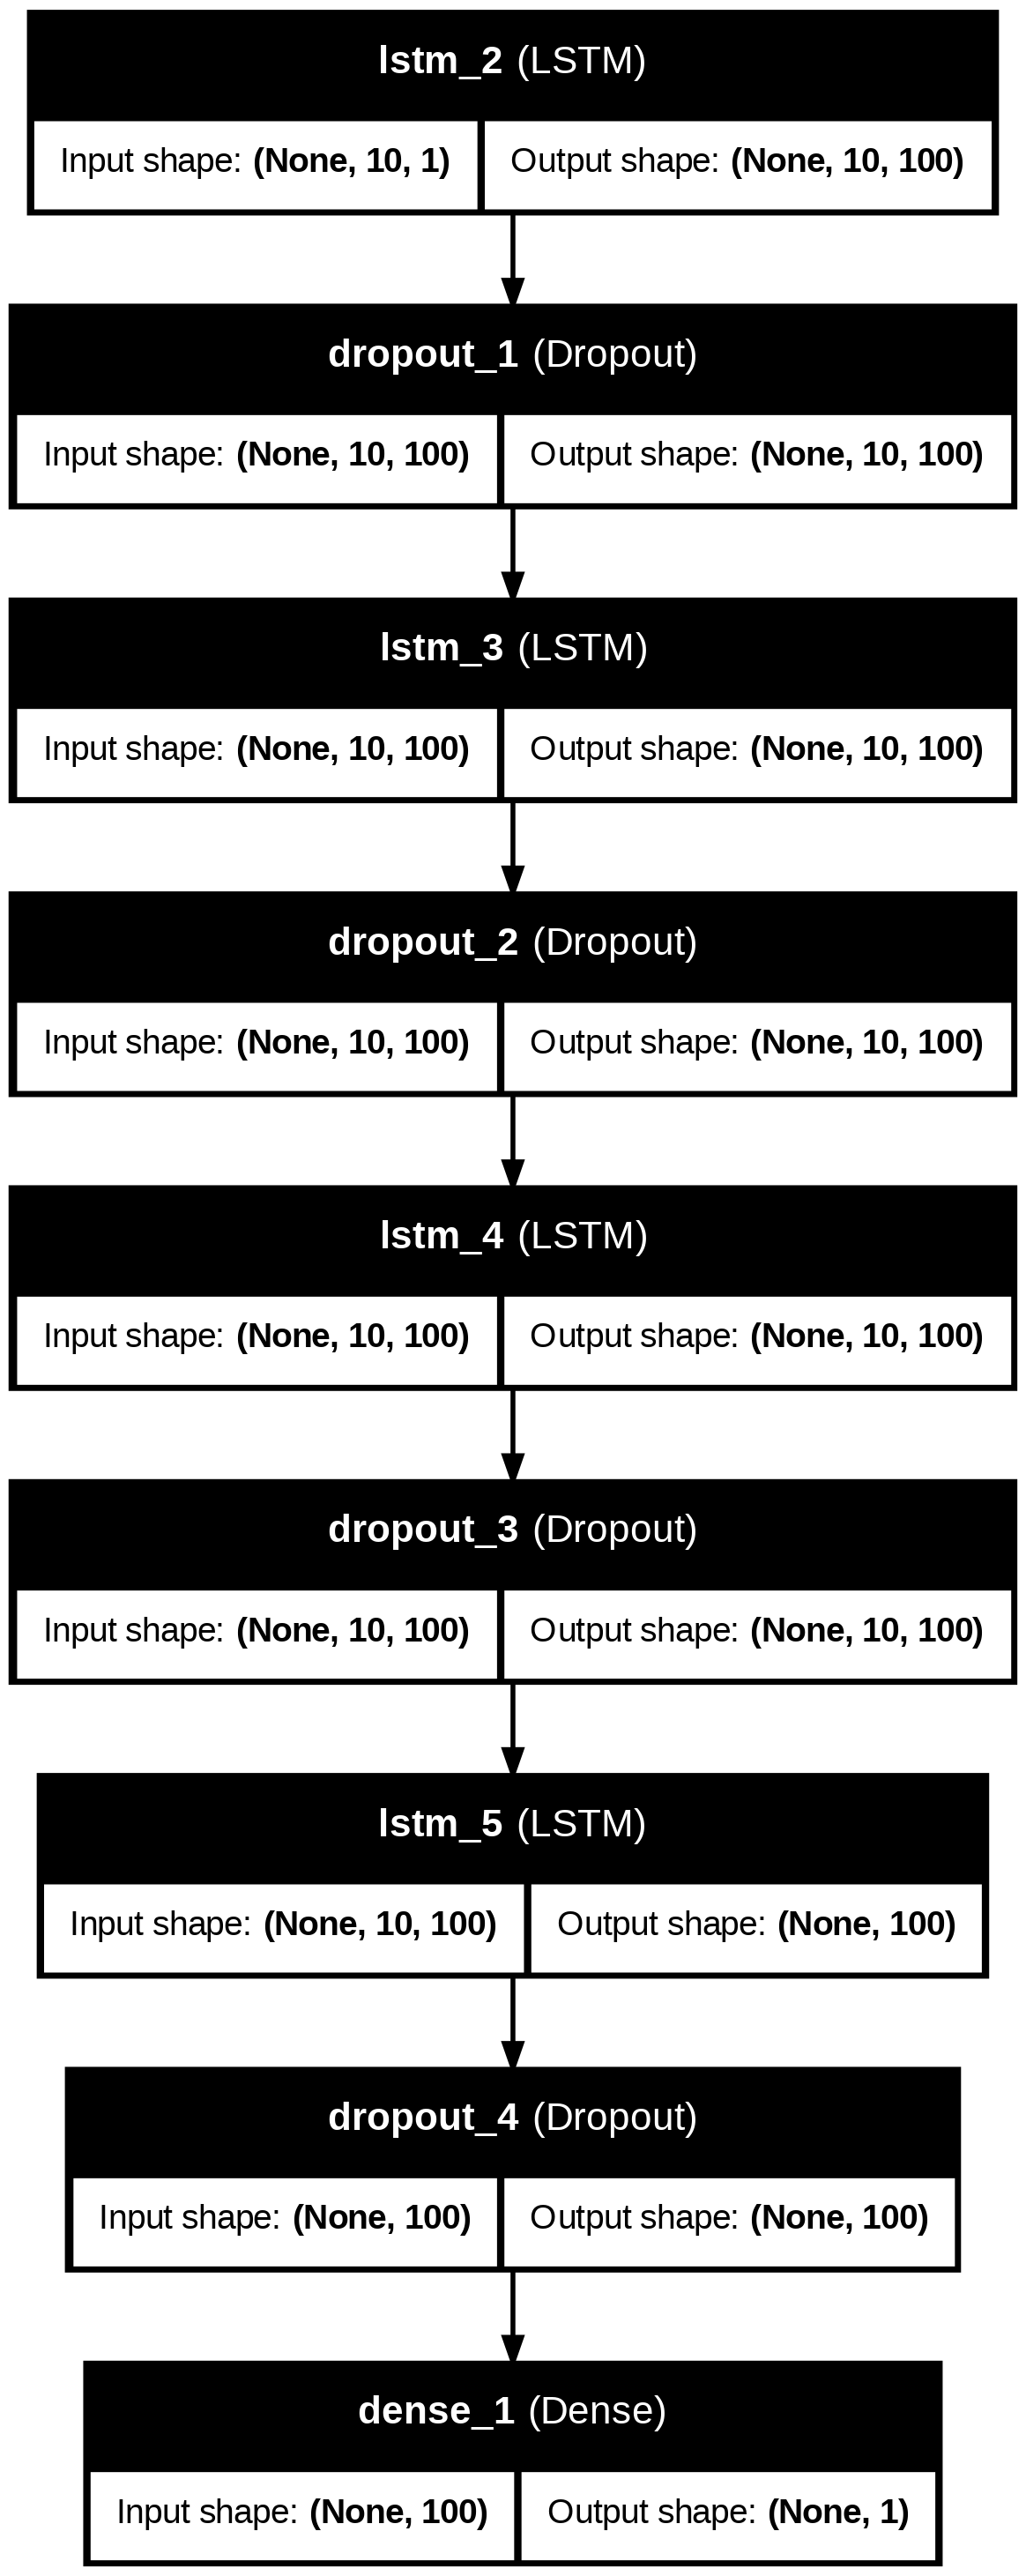

In [ ]:
# LSTM Model Architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
target_data = df['Close'][seq_length:seq_length+train_size]
model.fit(train, target_data, epochs=10, batch_size=32)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0765
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0030
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0024
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0033
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0023
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0022
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0021
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0028
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0022


In [ ]:
target_data = df['Close'][seq_length:seq_length+train_size]
historyy = model.fit(train, target_data, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0019 - val_loss: 9.1915e-04
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0025 - val_loss: 9.2289e-04
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0023 - val_loss: 9.4863e-04
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0019 - val_loss: 0.0014


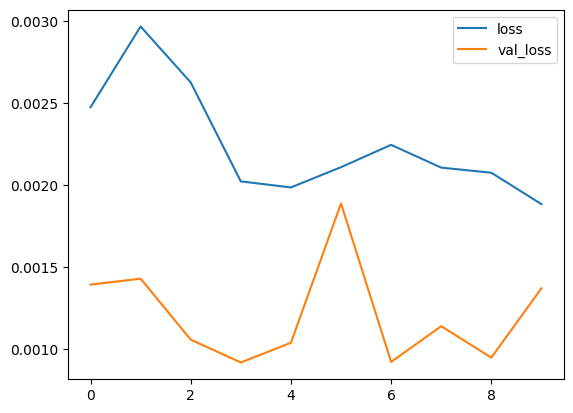

In [ ]:
history_df = pd.DataFrame(historyy.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
# Make Predictions
predictions = model.predict(test)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


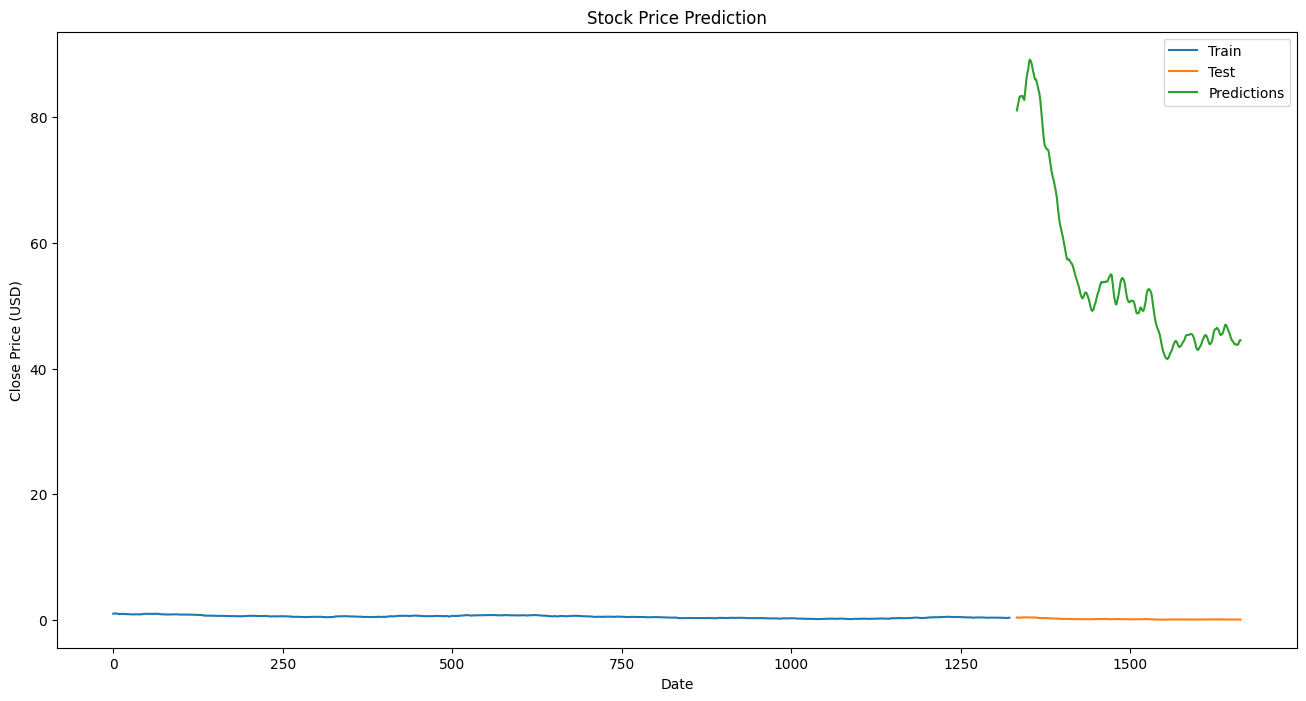

In [ ]:
train = df.iloc[:train_size, :]
test = df.iloc[train_size+seq_length:, :]

test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

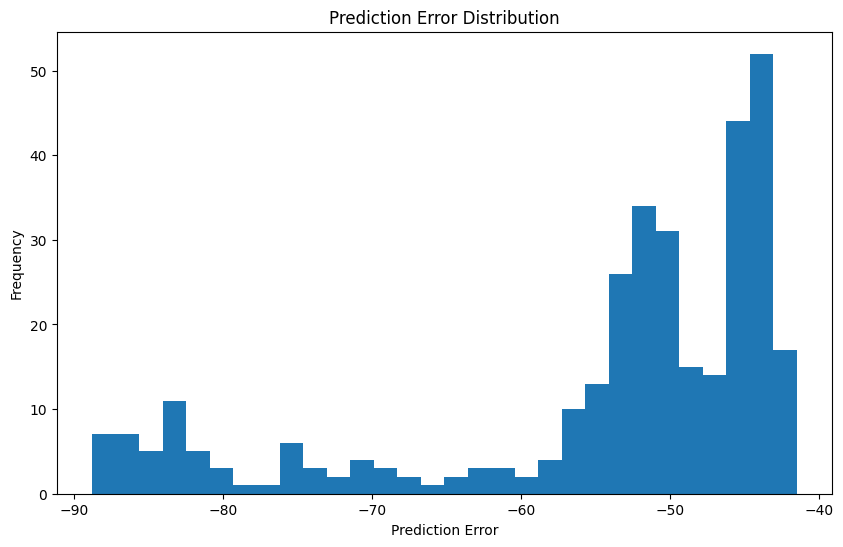

In [ ]:
#Prediction Error Distribution
error = test['Close'] - test['Predictions']
plt.figure(figsize=(10,6))
plt.hist(error, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

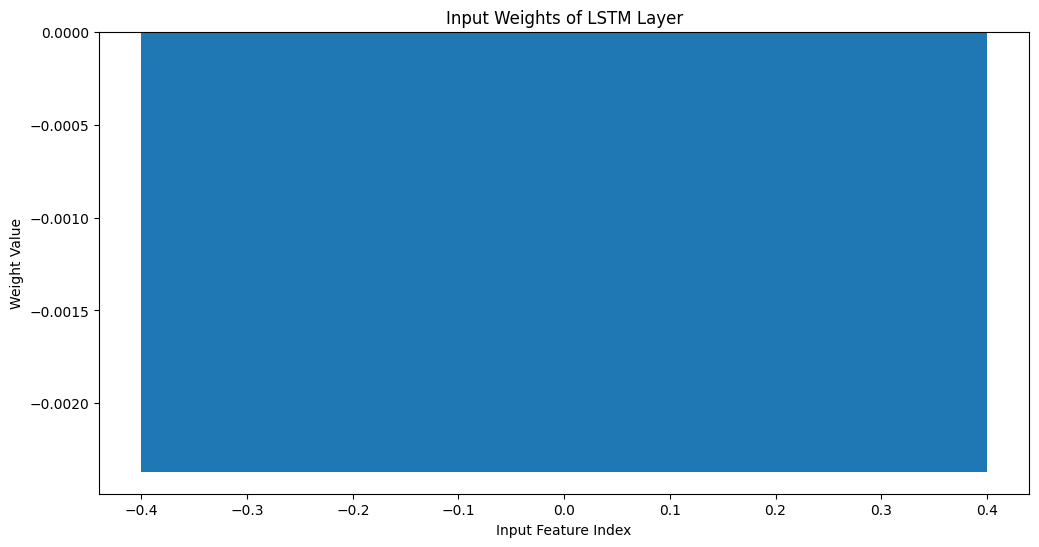

In [ ]:
weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(12,6))
plt.bar(range(len(weights)), weights[:, 0])
plt.title('Input Weights of LSTM Layer')
plt.xlabel('Input Feature Index')
plt.ylabel('Weight Value')
plt.show()

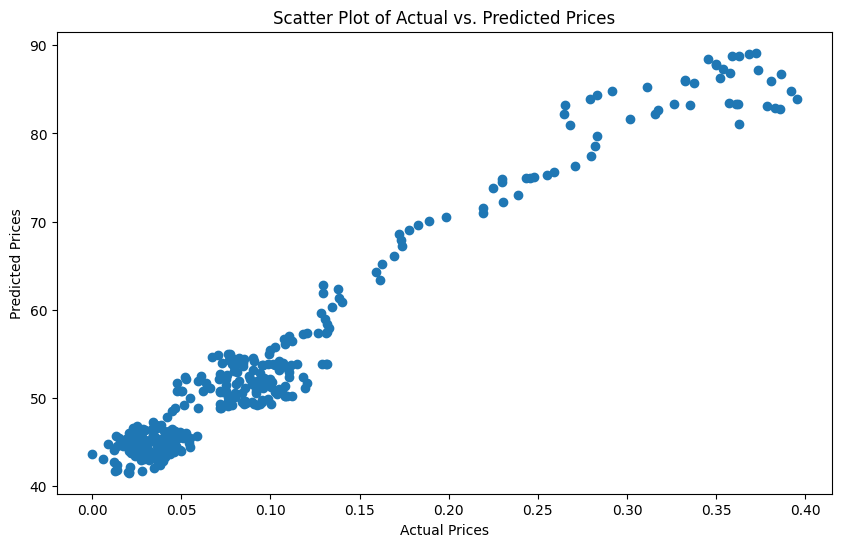

In [ ]:
#Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(test['Close'], test['Predictions'])
plt.title('Scatter Plot of Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

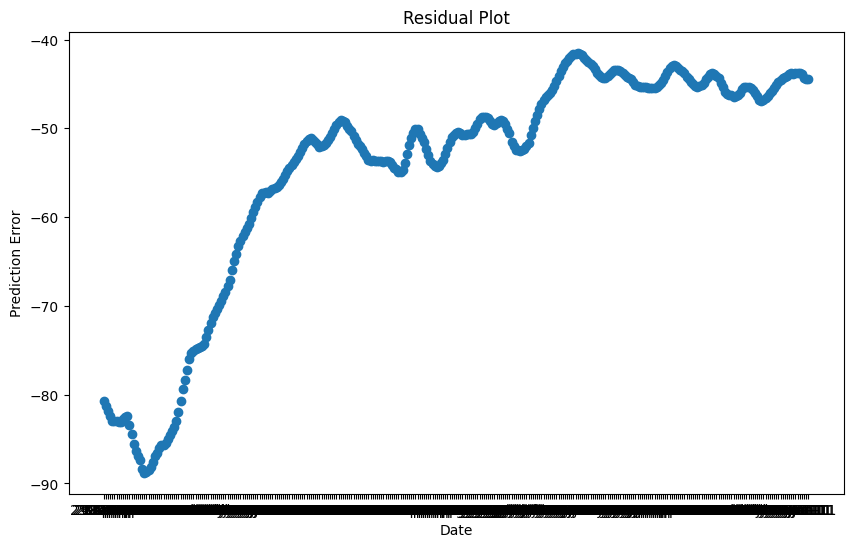

In [ ]:
# Residual Plot
plt.figure(figsize=(10,6))
plt.scatter(test['Date'], error)
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.show()

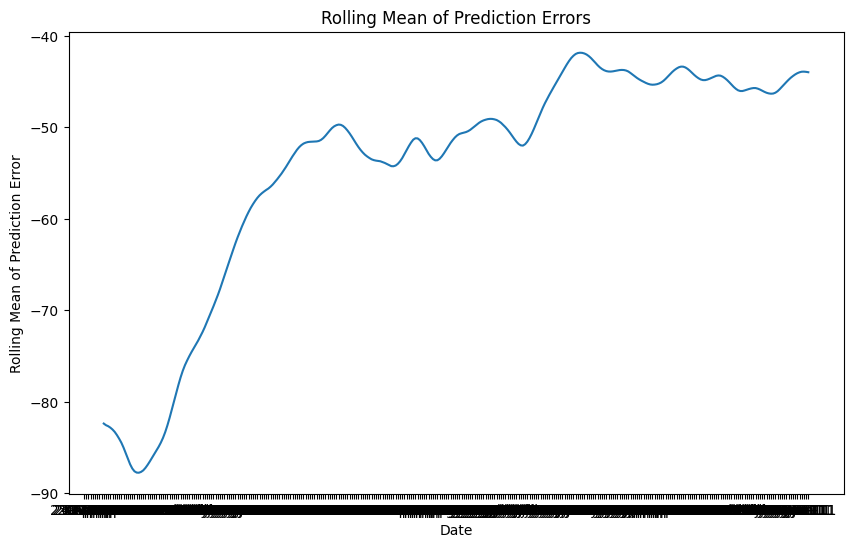

In [ ]:
# Rolling Mean of Prediction Errors
rolling_mean = error.rolling(window=10).mean()
plt.figure(figsize=(10,6))
plt.plot(test['Date'], rolling_mean)
plt.title('Rolling Mean of Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Rolling Mean of Prediction Error')
plt.show()

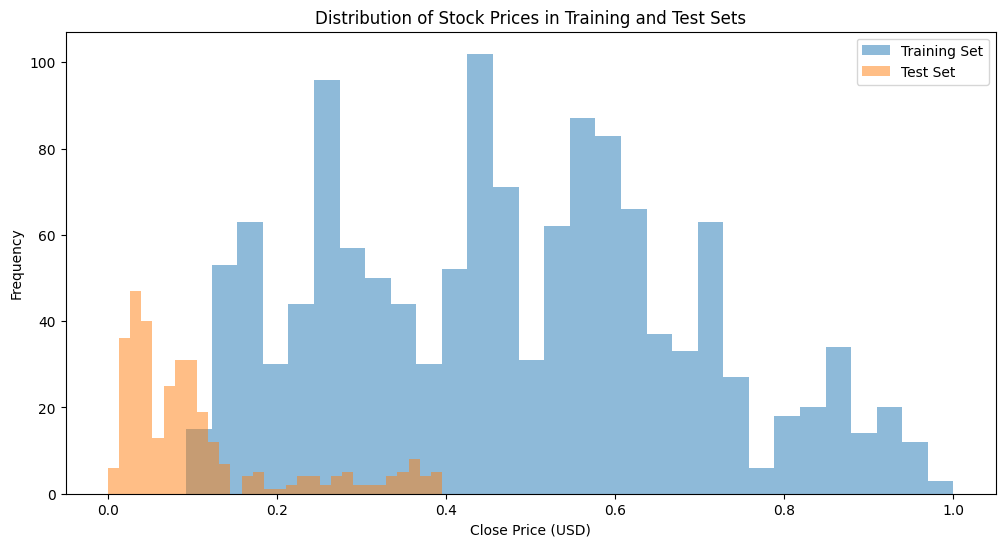

In [ ]:
# Distribution of Training and Test Sets
plt.figure(figsize=(12,6))
plt.hist(train['Close'], bins=30, alpha=0.5, label='Training Set')
plt.hist(test['Close'], bins=30, alpha=0.5, label='Test Set')
plt.title('Distribution of Stock Prices in Training and Test Sets')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

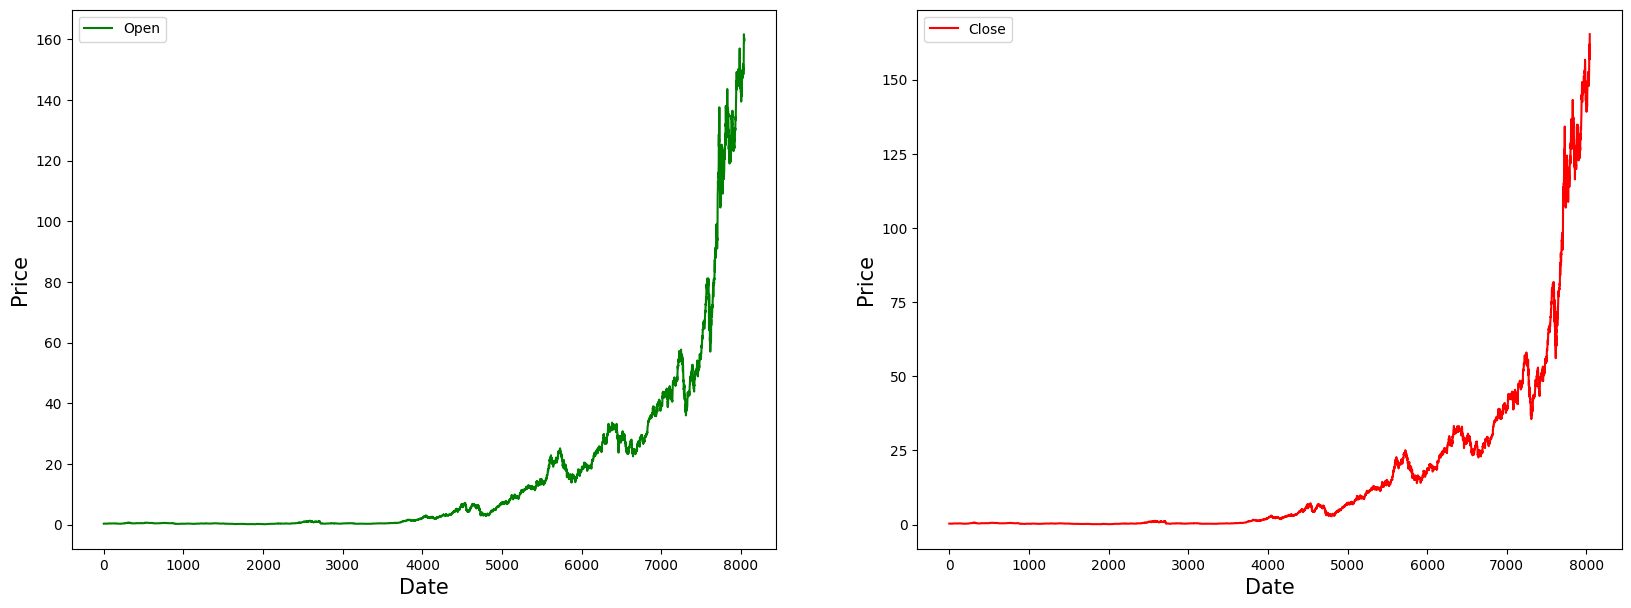

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df_n['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df_n['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 50, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,102 (121.49 KB)

 Trainable params: 31,102 (121.49 KB)

 Non-trainable params: 0 (0.00 B)